# **Intro to ML - Perceptron**

Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)


#**Perceptron**

1. Object-oriented API implementation of the Perceptron algorithm
2. Iris data (classifying *setosa* vs *versicolor*, and then *versicolor* vs *virginica*)
3. XOR problem
4. sklearn implementation
5. Conclusions


In [ ]:
from IPython.display import Image 

#**1. An object-oriented perceptron API**

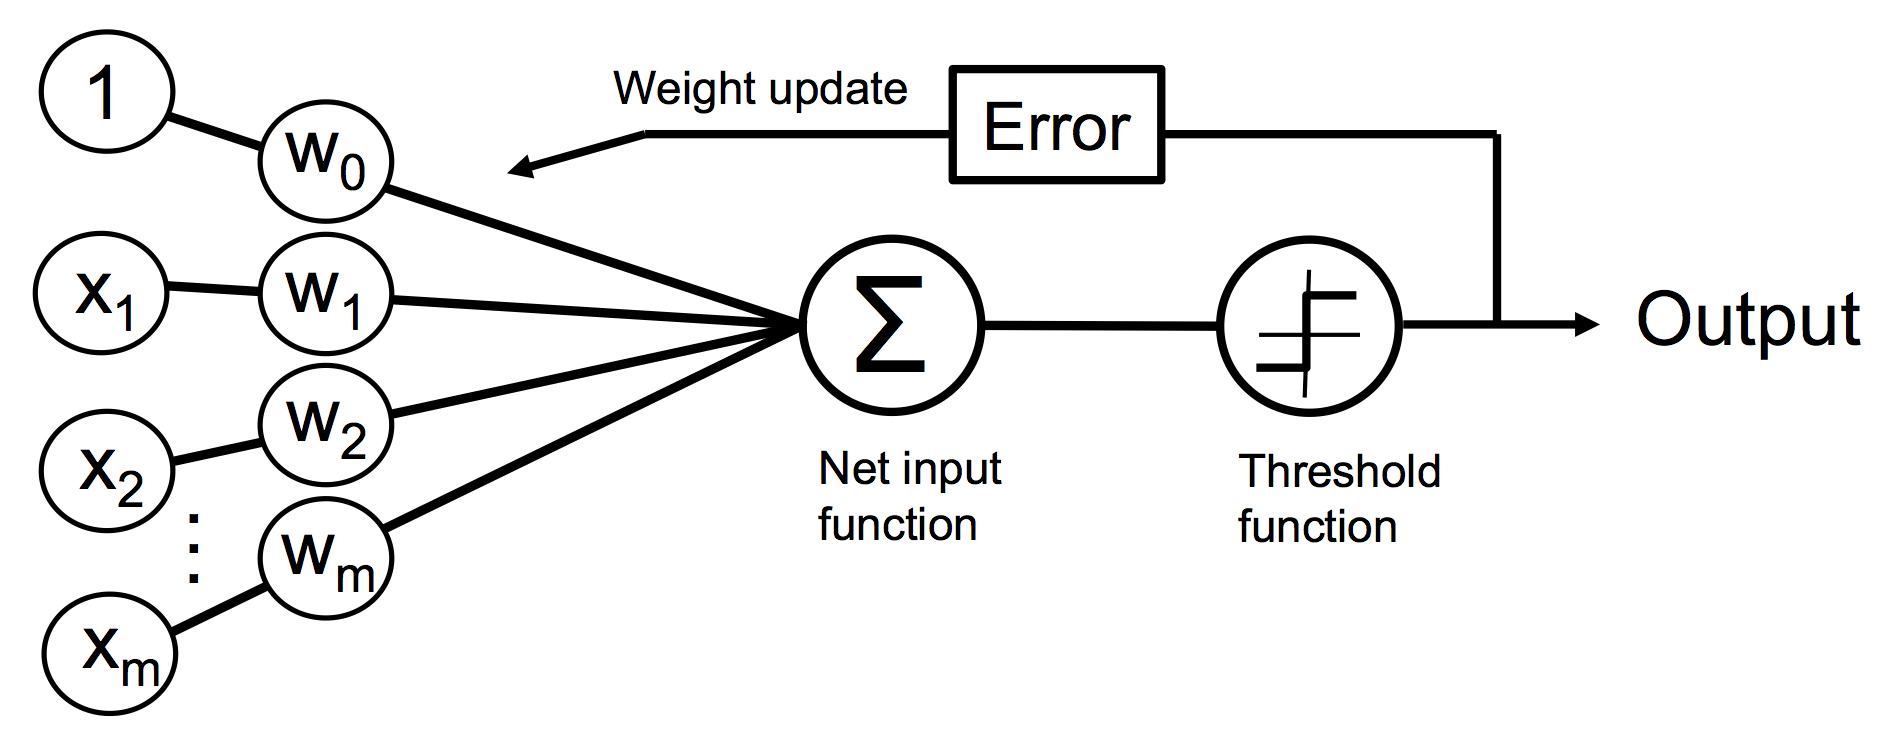



Math:

Let $x^{(i)}=(1,x_1^{(i)},\ldots ,x_m^{(i)})$ denote the $m$-dimensional input vector of instance $(i)$, and $w=(w_0,\ldots,w_m)$ the $m$-dimensional weight vector (with $w_0$ denoting the bias term).

The output of a Perceptron is computed as follows: $\hat{y}^{(i)}=\phi(z^{(i)})=1$ if $z^{(i)}>0$, and $-1$ otherwise, where $z^{(i)}=\sum_{j=0}^m w_j.x_j^{(i)}$ 

The "learning" from a randomly-selected instance $i$ takes place by updating the weights, as follows:
$w_j=w_j+\Delta w_j$ where $\Delta w_j = \eta(y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$.

$\eta$ is the learning rate.

Notice that $y^{(i)}-\hat{y}^{(i)}$ is the "actual minus the prediction": 
*   When this quantity is zero, the weights do not change. 
*   When this quantity is negative (i.e., $y^{(i)}-\hat{y}^{(i)} = -1-1=-2$), then the weights decrease, and will decrease the prediction going forward.
*   When the quantity is positive, i.e., $y^{(i)}-\hat{y}^{(i)} = 1--1 = 2$), then the weights increase, and will increase the prediction going forward.


In [ ]:
# Import libraries
import numpy as np                                # NumPy library (facilitates advanced mathematical and other types of operations on big data)
import pandas as pd                               # Pandas library (fundamental high-level data structure building blocks for doing practical, real-world data analysis)
import matplotlib.pyplot as plt                   # Matplotlib library (used to create static, animated, and interactive visualizations)
from matplotlib.colors import ListedColormap

In [ ]:
# Import libraries
import sklearn                                          # Sci-Kit Learn library (most important machine learning library in Python) 
from sklearn import datasets                            # Imports some toy daatsets embedded in the sklean library
from sklearn.preprocessing import StandardScaler        # Used to standardize a column of data (i.e., create z scores) 
from sklearn.linear_model import Perceptron             # Implementation of the Perceptron algorithm in sklearn 
from sklearn.model_selection import train_test_split    # Used to split data into training and test sets
from sklearn.metrics import accuracy_score              # Used to compute the accuracy of a machine learning classifier

In [ ]:
# Define Perceptron class                                 This code is copied from the class text (Raschka & Mirjalili)
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """

    # Constructor used to create Percepytron objects
    # NOte that eta defaults to 0.01, and n_iter to 50.
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        # Initialize weights to small random mumbers, and initialize errors to be an empty list
        rgen = np.random.RandomState(self.random_state)                   # Initialize random number generator
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])   # weights are initially normal variates with a mean of 0 and a standard deviation of 0.01
        self.errors_ = []

        # For n_iter iterations, compute predictions and updates, update weights, and compute and record errors
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    # Function that calculates weighted input of Perceptron
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Function that applies step function to net_input to calculate and return output of Perceptron 
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
# Confusion Matrix & Accuracy

# This mplements a 2D confusion matrix calculation using an inefficient loop. 
# This is done for educational clarity. There is a method in sklearn that is ordinarily used in its pleace.  
def confusion_matrix(y_hat,y):                          # Define confusion_matrix method      
  confusion = np.zeros([2,2])                           # Populate 2x2 Numpy array with zeros
  for i in range(0,len(y)):                             # Loop, with the value of i ranging from 0 to the length of y:
    if (y_hat[i] == 1) & (y[i] == 1):                     # If actual = predicted = 1 then add one to the true positive cell of the confusion matrix
      confusion[1,1] = confusion[1,1] + 1
    if (y_hat[i] == 1) & (y[i] == -1):                    # If actual = -1 and predicted = 1 then add one to the false positive cell of the confusion matrix
      confusion[0,1] = confusion[0,1] + 1                 
    if (y_hat[i] == -1) & (y[i] == 1):                    # If actual = -1 and predicted = 1 then add one to the false negative cell of the confusion matrix
      confusion[1,0] = confusion[1,0] + 1 
    if (y_hat[i] == -1) & (y[i] == -1):                   # If actual = predicted = -1 then add one to the true negative cell of the confusion matrix
      confusion[0,0] = confusion[0,0] + 1                 
  return(confusion)


#**2. Iris dataset**

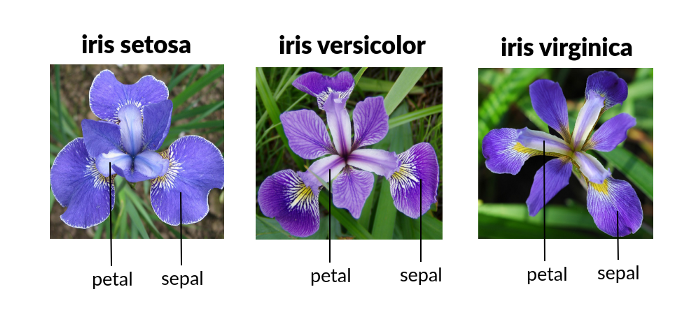
Source: https://medium.com/@naidubhavya06/detailed-explanation-of-exploratory-data-analysis-using-iris-dataset-fa8082a4ce0f Fair use claimed.

In [ ]:
# Read iris.data file from UCI Machine Learning Repo into data frame and display its tail (the last five instances)
# The data dictionary for this data set is as follows:
# Column 0: Sepal length (in centimeters)
# Column 1: Sepal width (in centimeters)
# Column 2: Petal length (in centimeters)
# Column 3: Petal width (in centimeters)
# Column 4: Species of iris (setosa/virginica/versicolor)
# The first 50 instances are iris setosa, the next 50 instances are iris versicolor, and the final 50 instances are iris virginica

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)            # Reads data from UCI into df dataframe
df.tail()                                                                                                            # Shows the last five instances of df

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### *Plotting the Iris data*

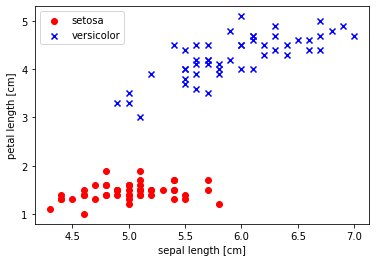

Note that it is easy to separate iris setosa and iris versicolor


In [ ]:
%matplotlib inline

# select setosa and versicolor
y = df.iloc[0:100, 4].values                  # The first 50 instances are iris setosa, the next 50 are iris versicolor
y = np.where(y == 'Iris-setosa', -1, 1)       # Code iris setosa as -1, and iris versicolor as 1

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values             # Use column 0 (sepal length) and 2 (petal length) as predictors 

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()
print("Note that it is easy to separate iris setosa and iris versicolor")

### *Training the Perceptron model (setosa vs versicolor)*

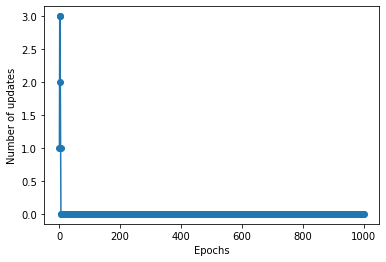

In [ ]:
# Create Perceptron object called ppn
ppn = Perceptron(eta=0.1, n_iter=1000)

# Fit Perceptron model to iris data 
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### *A function for plotting decision regions*

In [ ]:
# Function to plot two-variable decision regions of a classifier 
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black') 

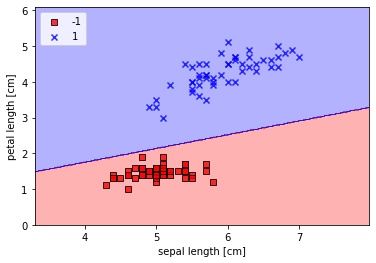

In [ ]:
# Plot decision region
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

###*Confusion Matrix*

tn = true negative, tp = true positive
fn = false negative, fp = false positive

[[tn, fp]
 [fn, tp]]

Accuracy = (tp + tn)/(tp + tn + fp + fn)

In [ ]:
# Compute confusion matrix
y_hat = ppn.predict(X)
cm = confusion_matrix(y_hat,y)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) 
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy)    

Confusion matrix
 [[50.  0.]
 [ 0. 50.]] 

Accuracy =  1.0


### *Training the Perceptron model (versicolor & virginica)*

---



(150, 5)
(100, 2) (100,)


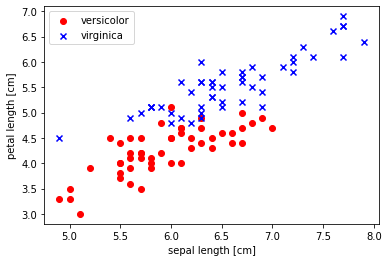

Note that it is LESS easy to separate iris virginica  and iris virginica


In [ ]:
# Now classify versicolor vs virginica
%matplotlib inline

# select setosa and versicolor
y = df.iloc[50:150, 4].values                  
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[50:150, [0, 2]].values
print(df.shape)
print(X.shape, y.shape)

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()
print("Note that it is LESS easy to separate iris virginica  and iris virginica")

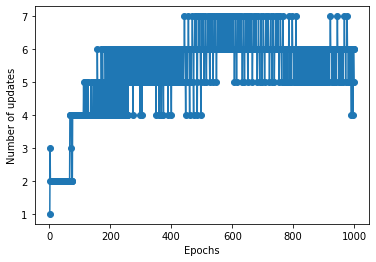

In [ ]:
# Create Perceptron object called ppn
ppn = Perceptron(eta=0.01, n_iter=1000)

# Fit Perceptron model to iris data 
ppn.fit(X, y)


plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

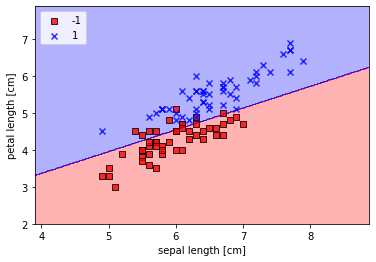

In [ ]:
# Plot decision region
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [ ]:
# Compute confusion matrix
y_hat = ppn.predict(X)
cm = confusion_matrix(y_hat,y)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) 
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy)    

Confusion matrix
 [[39. 11.]
 [ 0. 50.]] 

Accuracy =  0.89


#**3. XOR Dataset**

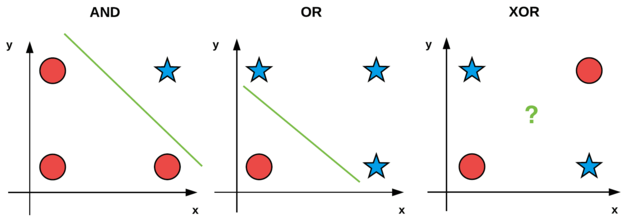
Source: https://www.pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/ Fair use claimed

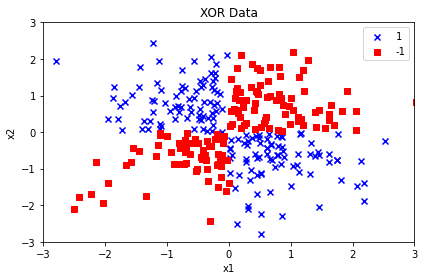

In [ ]:
# Create the XOR data set
np.random.seed(1)               # Set the seed to "1", for consistency 

###############################
X_xor = np.random.randn(300, 2) # Need to change here for assignment 
###############################

y_xor = np.logical_xor(X_xor[:, 0] > 0,   # https://numpy.org/doc/stable/reference/generated/numpy.logical_xor.html
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor ==  1, 0], X_xor[y_xor ==  1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.title('XOR Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

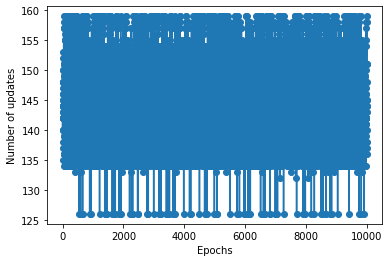

In [ ]:
# Fit a Perceptron model tp the XOR data
ppn = Perceptron(eta=0.01, n_iter=10000)

# Fit Perceptron model to iris data 
ppn.fit(X_xor, y_xor)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()


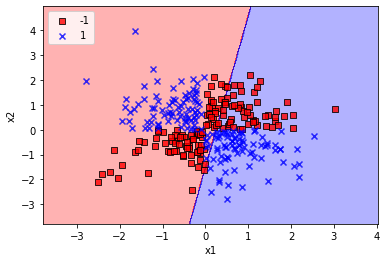

In [ ]:
# Plot decision region
plot_decision_regions(X_xor, y_xor, classifier=ppn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')

# plt.savefig('images/02_08.png', dpi=300)
plt.show()

In [ ]:
# Compute confusion matrix
y_hat = ppn.predict(X_xor)
cm = confusion_matrix(y_hat,y_xor)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) 
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy)    

Confusion matrix
 [[88. 51.]
 [87. 74.]] 

Accuracy =  0.54


#**4. sklearn Implementation of Perceptron**

###*Iris Data*

In [ ]:
# Split the data into a holdout training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Scale predictor data to have mean zero and unit variance
scaler = StandardScaler()
scaler.fit(X_train)   # Obtain scaling parameters from training data
X_train_std = scaler.transform(X_train)    # Now use those parameters to scale the training data
X_test_std = scaler.transform(X_test)          # And test data SEPARATELY (to prevent data leakags)

In [ ]:
# Fit a Perceptron model
ppn = sklearn.linear_model.Perceptron(eta0=0.1, max_iter = 100, random_state=12234)

# Train Perceptron
ppn.fit(X_train_std, y_train)

# Predict target values for X_test_std
y_hat = ppn.predict(X_test_std)

# Report confusion matrix and accuracy
cm = confusion_matrix(y_hat,y_test)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) 
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy)  

Confusion matrix
 [[10.  1.]
 [ 0. 14.]] 

Accuracy =  0.96


###*XOR Data*

In [ ]:
# Split the data into a holdout training and test data
X_train, X_test, y_train, y_test = train_test_split(X_xor, y_xor, test_size=0.25)

In [ ]:
# Scale predictor data to have mean zero and unit variance
scaler = StandardScaler()
scaler.fit(X_train)   # Obtain scaling parameters from training data
X_train_std = scaler.transform(X_train)    # Now use those parameters to scale the training data
X_test_std = scaler.transform(X_test)          # And test data SEPARATELY (to prevent data leakags)

In [ ]:
# Fit a Perceptron model
ppn = sklearn.linear_model.Perceptron(eta0=0.1, max_iter = 1000, random_state=0)

# Train Perceptron
ppn.fit(X_train_std, y_train)

# Predict target values for X_test_std
y_hat = ppn.predict(X_test_std)

# Report confusion matrix and accuracy
cm = confusion_matrix(y_hat,y_test)
accuracy =  (cm[0,0] + cm[1,1])/( cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]) 
print("Confusion matrix\n",cm, "\n\nAccuracy = ",accuracy)  

Confusion matrix
 [[16. 19.]
 [15. 25.]] 

Accuracy =  0.5466666666666666


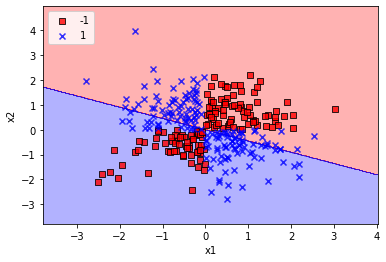

In [ ]:
# Plot decision region
plot_decision_regions(X_xor, y_xor, classifier=ppn)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
 
# plt.savefig('images/02_08.png', dpi=300)
plt.show()

#**5. Conclusion**

1. Iris setosa is easy to distinguish from iris virginica and iris versicolor (we don't need a classifoier to do this).
2. Distinguishing iris virginica from iris versicolor is a slightly harder problem, and a Perceptron does a reasponable job on this task (accuracy of approximately 89%).
3. The XOR data cannot be reliably classified using a Perceptron (Perceptron accuracy is roughly 50%).